In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
from utils import (
    create_fasta_file, create_random_strand, reverse_complement,
    read_synthesized_strands_from_file, get_fastq_records, get_badread_strand_id
)
from checksum import CheckSum4
import random
from clustering import Clustering
import numpy as np
from strand_reconstruction import align
import sys
from utils import reverse_complement
np.set_printoptions(threshold=sys.maxsize)

In [3]:
# Read cat.fasta - add encoding
# write fasta
# badread
# do clustering get candidates
# decode without apriori
checksum = CheckSum4(reference_length=300)

In [4]:
original_strands, original_strand_ids = read_synthesized_strands_from_file(file_path=r"C:\Users\Parv\Doc\RA\Projects\clustering_dna_storage\priority\cat_FFDX.jpg_RU10.fasta")

In [5]:
encoded_strands = checksum.encode(original_strands)

In [100]:
create_fasta_file(ids=original_strand_ids, strands=encoded_strands, output_filepath='cat_encoded.fasta')

File saved as cat_encoded.fasta


In [6]:
# Raptor
records = get_fastq_records(fastq_filepath=r"C:\Users\Parv\Doc\RA\Projects\clustering_dna_storage\cat_encoded_synth.fasta\cat_encoded_synth.fasta")

21469it [00:01, 12635.04it/s]


In [7]:
reads = [str(i.seq) for i in records]
ids = [get_badread_strand_id(i) for i in records]

In [11]:
clustering = Clustering(strand_pool=reads, reference_length=304, original_strands=encoded_strands, strand_pool_ids=ids, original_strand_ids=original_strand_ids, distance_threshold=40)

Filtering strands by length
0.05337929107084634 strands filtered out
Removing adapters


100%|██████████| 20323/20323 [00:01<00:00, 16256.53it/s]


Clustering strands
Total strands 20323


100%|██████████| 20323/20323 [01:31<00:00, 221.34it/s]


Number of clusters = 1094
Clusters are sorted
Orientation fixed in the strand pool
Generating 764 candidates


100%|██████████| 764/764 [03:38<00:00,  3.50it/s]


Evaluating candidates


764it [00:11, 66.66it/s]


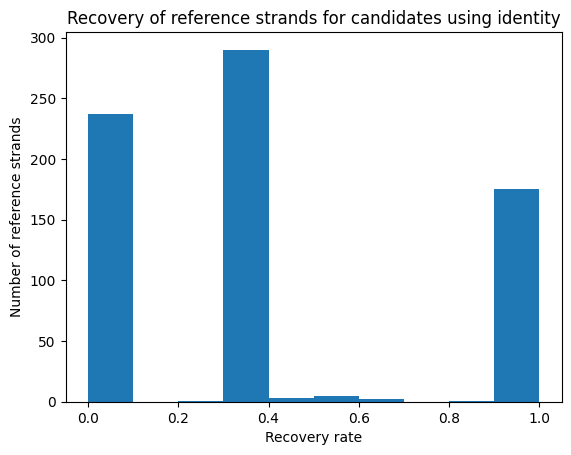

In [12]:
clustering.run_pipeline()

In [19]:
# We want to recover the original strands after checksum
decoded_strands = checksum.decode(candidates=clustering.candidates, n_reference_strands=len(original_strands), clustered_seqs=clustering.clustered_seqs, n_guesses=5, guesses=True)

clustering.original_strands = original_strands
clustering.fsm(candidates=decoded_strands)


100%|██████████| 764/764 [00:00<00:00, 7197.40it/s]


381 direct checksum matches found
Making guesses


100%|██████████| 383/383 [02:54<00:00,  2.19it/s]

202 extra found after guessing
0.5008576329331046 were reversed
583 Valid checksum strands found
Found 580


False

583it [00:00, 5322.19it/s]


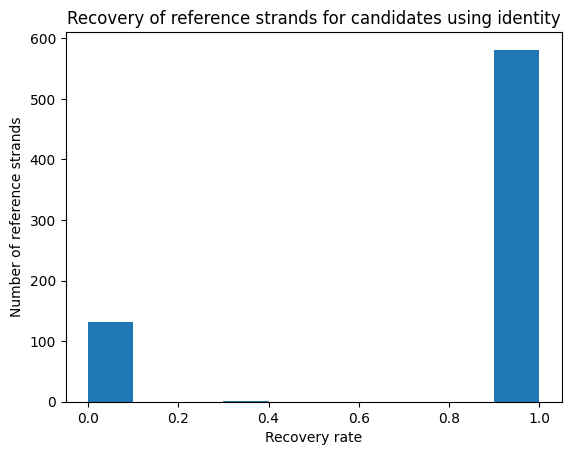

{'reference_recoveries': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.99      , 1.        , 1.        , 1.        ,
        1.        , 1.  

In [23]:
clustering.original_strands = original_strands
clustering.evaluate_candidates(decoded_strands, hist=True)

In [25]:
import uuid
ids = [str(uuid.uuid4()) for i in range(len(decoded_strands))]
create_fasta_file(ids, decoded_strands, output_filepath='decoded_raptor.fasta')

File saved as decoded_raptor.fasta


In [14]:

# Multiple alignment is super slow for longer strands